In [1]:
# I'm going to migrate public kaggle R kernel I found pretty good to Python kernel
# Interesting parts:
# 1. Features removing
# 2. QQ graph and target log transformation
# 3. xgboost
# 4. Bayesian optimization 

In [17]:
# Lib for Bayesian optimization:
# https://github.com/fmfn/BayesianOptimization
#
# Examples of usage:
# https://www.kaggle.com/tilii7/bayesian-optimization-of-xgboost-parameters
# https://www.kaggle.com/btyuhas/bayesian-optimization-with-xgboost

# So first I should understand in common how Bayesian optimization works using github library page (read links from Quick Start section)
# Then need to undersnad R code of optimization
# And after this use the kaggle pages above to learn Python examples of the library real usage

In [11]:
import numpy as np
import pandas as pd
from bayes_opt import BayesianOptimization
from os.path import join
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# Global variables
data_set_path = "/mnt/c/dmitrys/education/kaggle/house-prices-advanced-regression-techniques"

In [7]:
# Import data
train_df = pd.read_csv(join(data_set_path, "train.csv"))
test_df = pd.read_csv(join(data_set_path, "test.csv"))

In [10]:
train_X = train_df.drop(['SalePrice'], axis=1)
train_y = train_df['SalePrice'].to_numpy()

In [12]:
# Exploratory Data Analysis (EDA)
# I've spent some time to find some Python libs for EDA
# 1. Dora
# https://github.com/NathanEpstein/Dora
# https://www.kaggle.com/krrai77/eda-using-python-dora
# https://towardsdatascience.com/exploratory-data-analysis-using-dora-ac596e5a32a6
# 2. lens
# 
# 3. pandas itself
# https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas
# 4. pandas-profiling (6.2k starts on githib!)
# https://github.com/pandas-profiling/pandas-profiling/
# https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae
# https://www.kaggle.com/frtgnn/simple-profiling-eda-using-pandas-profiling
# Great tool!
# 5. Sweetviz
# 
# 6. Autoviz
# https://github.com/AutoViML/AutoViz
# 7. D-Tale
# https://github.com/man-group/dtale

# Iterestings article abour R tools:
# https://www.groundai.com/project/the-landscape-of-r-packages-for-automated-exploratory-data-analysis/1

In [2]:
# lets try to use pandas-profiling first
# profile = ProfileReport(train_df, title="Pandas Profiling Report")

In [1]:
# profile

In [20]:
# Interesting thing which I've noticed first is Warnings tab, and on it I've found warnings about:
# 1. columns with many missing values
# 2. Columns with many zeros

# I think I should try to exclude features with many zeros also or use binary feature for it, for example for PoolArea
# So has the house pool or not

# Also I see this warnings below feature name in the features list
# I can click on "Toggle details" button to see more statistics, big histogram, common values, extreme values (max 5 and min 5)

# Very interesting is "Interactions" section where pair of features may be selected 
# So we can see how strong dependency is

In [ ]:
# Analogue of vis_dat in pandas-profiling is "Missing values" section (Matrix tab of it)
# Analogut of DataExplorer::plot_missing is either Warnings or Count tab of "Missing values"

## Cleaning

In [13]:
cols_to_remove = train_df.columns[train_df.isnull().mean() > 0.4]

## Target distribution

In [24]:
def show_target_distribution(y):
    fig1 = plt.figure(constrained_layout=True, figsize=(8, 6), dpi=80)
    gs = fig1.add_gridspec(2, 2)

    # QQ - https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html
    f1_ax1 = fig1.add_subplot(gs[:, 0])
    qqplot(y, line='s', ax=f1_ax1)

    # Boxplot - https://matplotlib.org/3.3.2/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
    f1_ax2 = fig1.add_subplot(gs[0, 1])
    red_square = dict(markerfacecolor='r', marker='s')
    f1_ax2.boxplot(y, vert=False, flierprops=red_square)

    # Boxplot - https://matplotlib.org/3.3.2/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py
    f1_ax3 = fig1.add_subplot(gs[1, 1])
    f1_ax3.hist(y, bins=40)

    plt.show()

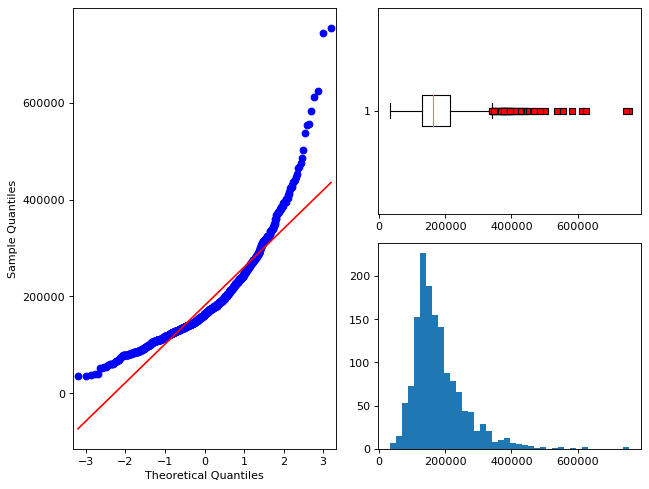

In [25]:
show_target_distribution(train_y)

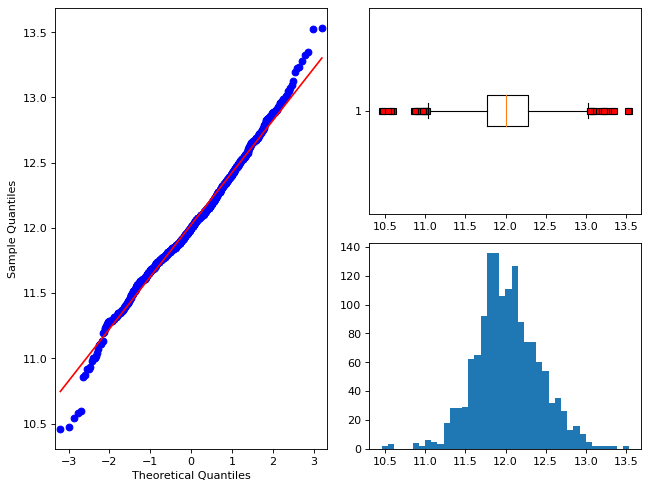

In [26]:
show_target_distribution(np.log(train_y))